# Algorithme naif de Bayes (ou _Naive Bayes_)

La Naive Bayes est un algorithme de classification supervisée basé sur le théorème de Bayes avec une hypothèse forte d'indépendance (d'où le terme naïf.)

L'objectif est de donner une probabilité à chaque classe $y\in\mathcal{C}$ pour un point $x=(x_1,x_2,\ldots,x_d)$, afin de choisir la plus probable.

Nous souhaitons donc prédire: $\quad\hat{y}=\arg\max_{y\in\mathcal{C}}\;P(y|\,x)$

Rappelons le théorème de Bayes $P(y|x)=\dfrac{P(x|y)\cdot{}P(y)}{P(x)}$

La probabilité $P(x)$ étant la même pour toutes les classes, nous pouvons le négliger dans l'argument du maximum, qui se réécrit alors:

$$\hat{y} = \arg\max_{y\in\mathcal{C}}\,P(x|y)\cdot{}P(x)$$

De plus, en supposant les variables $x_i$ indépendantes conditionnellement à la classe $y$, la probabilité $P(x|y)$ se réécrit comme produit des probabilités $P(x_i|y)$.

Finalement le problème s'écrit par la prédiction:

$$\hat{y}=\arg\max_{y\in\mathcal{C}}\;P(y)\prod_{i=1}^d{}P(x_i|y)$$

où $P(y)$ est la probilité a priori des classes. 

Ainsi, $P(y=c)=\dfrac{\text{nbre d'exemples de classe c}}{n}$.

## Probabilités conditionnelles

Selon le type de données, nous utiliserons différentes versions du modèle:

| Type de variable $x_i$ | Modèle utilisé |
|--------------|---------------------------|
|Catégorielle | Multinominal ou Bernoulli  |
|Numérique | Gaussien                      |


Accuracy: 0.85


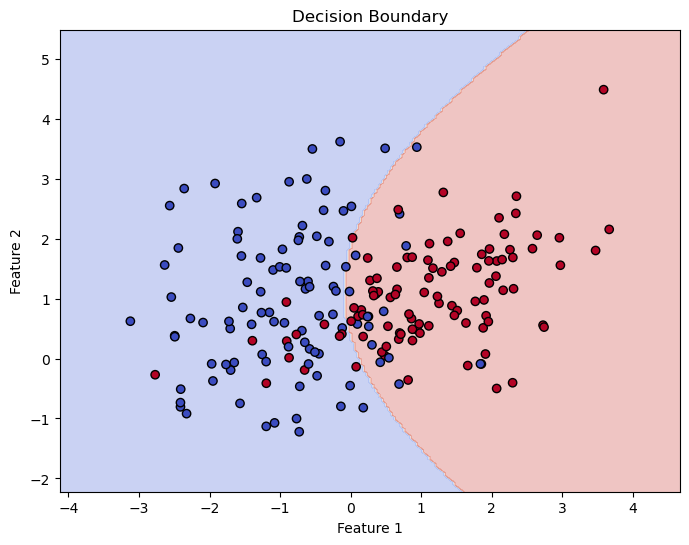

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# We'll use make_classification to generate synthetic data and 
# GaussianNB to train the classifier

# 1. Generate synthetic 2D classification dataset
X, y = make_classification(
    n_samples=200, n_features=2, n_informative=2, n_redundant=0,
    n_clusters_per_class=1, n_classes=2, random_state=42
)

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

# 4. Predict
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

# 5. Plot decision boundary
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot
plot_decision_boundary(X, y, model)
